In [19]:
import pandas as pd
def load_diabetes_data():
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
    columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
    data = pd.read_csv(url, header=None, names=columns)
  
    
    return data

data=load_diabetes_data()
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

==== Logistic Regression Evaluation ====
Confusion Matrix:
 [[79 20]
 [18 37]]
Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607

==== Perceptron Evaluation ====
Confusion Matrix:
 [[69 30]
 [22 33]]
Accuracy: 0.6623
Precision: 0.5238
Recall: 0.6000
F1 Score: 0.5593


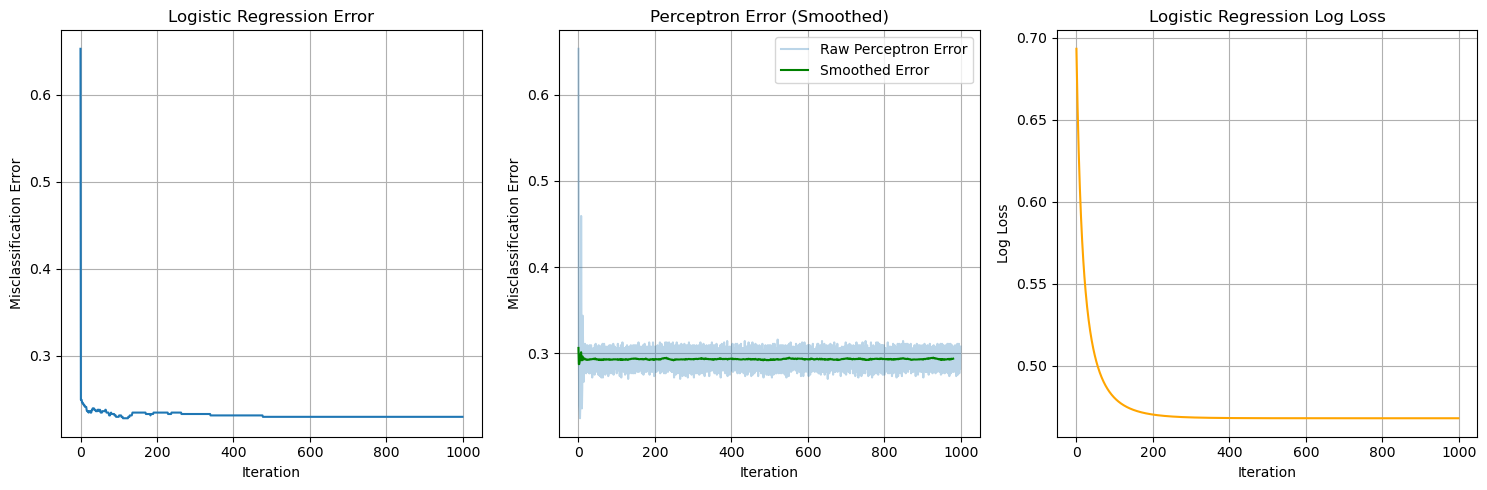

In [22]:


# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log loss function
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Misclassification error
def misclassification_error(y_true, y_pred_probs, threshold=0.5):
    y_pred_labels = (y_pred_probs >= threshold).astype(int)
    return np.mean(y_pred_labels != y_true)

# Logistic Regression (Gradient Descent)
def logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    log_losses, errors = [], []

    for _ in range(iterations):
        predictions = sigmoid(X @ theta)
        theta -= (learning_rate / m) * (X.T @ (predictions - y))
        log_losses.append(log_loss(y, predictions))
        errors.append(misclassification_error(y, predictions))
    
    return theta, log_losses, errors

# Perceptron from scratch
def perceptron(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    errors = []

    for _ in range(iterations):
        predictions = np.where(X @ theta >= 0, 1, 0)
        theta += learning_rate * X.T @ (y - predictions)
        errors.append(np.mean(predictions != y))

    return theta, errors

# Evaluation metrics
def evaluate_model(y_true, y_pred_labels):
    cm = confusion_matrix(y_true, y_pred_labels)
    acc = accuracy_score(y_true, y_pred_labels)
    prec = precision_score(y_true, y_pred_labels)
    rec = recall_score(y_true, y_pred_labels)
    f1 = f1_score(y_true, y_pred_labels)

    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Moving average for smoothing
def moving_average(data, window_size=20):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Plot comparison
def plot_comparison(logistic_errors, perceptron_errors, logistic_log_loss):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(logistic_errors, label='Logistic Regression')
    plt.xlabel('Iteration')
    plt.ylabel('Misclassification Error')
    plt.title('Logistic Regression Error')
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.plot(perceptron_errors, alpha=0.3, label='Raw Perceptron Error')
    plt.plot(moving_average(perceptron_errors), color='green', label='Smoothed Error')
    plt.xlabel('Iteration')
    plt.ylabel('Misclassification Error')
    plt.title('Perceptron Error (Smoothed)')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(logistic_log_loss, color='orange', label='Log Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Log Loss')
    plt.title('Logistic Regression Log Loss')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Main
def main():
    data = load_diabetes_data()
    X = data.drop("Outcome", axis=1).values
    y = data["Outcome"].values

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Add bias
    X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
    X_test_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

    # Logistic Regression
    theta_log, log_losses, log_errors = logistic_regression(X_train_bias, y_train, learning_rate=0.1, iterations=1000)

    # Perceptron
    theta_perc, perc_errors = perceptron(X_train_bias, y_train, learning_rate=0.01, iterations=1000)

    # Prediction & Evaluation (Logistic)
    y_pred_probs_log = sigmoid(X_test_bias @ theta_log)
    y_pred_log = (y_pred_probs_log >= 0.5).astype(int)

    print("==== Logistic Regression Evaluation ====")
    evaluate_model(y_test, y_pred_log)

    # Prediction & Evaluation (Perceptron)
    y_pred_perc = np.where(X_test_bias @ theta_perc >= 0, 1, 0)

    print("\n==== Perceptron Evaluation ====")
    evaluate_model(y_test, y_pred_perc)

    # Plot comparison
    plot_comparison(log_errors, perc_errors, log_losses)

if __name__ == "__main__":
    main()
